# Correlation Analysis

In [2]:
%cd ../..
from src.data.files import Data
from src.data.synthesizer import MachineSignalSynth, LinearSingleStepMultiMachine, OptLinearSingleStepMultiMachine
import pandas as pd

/root/marching-penguin


In [3]:
all_events = Data.get_events()
tel = Data.get_telemetry()

In [4]:
synthesizer = MachineSignalSynth(tel, all_events, OptLinearSingleStepMultiMachine())
df = synthesizer.generate()

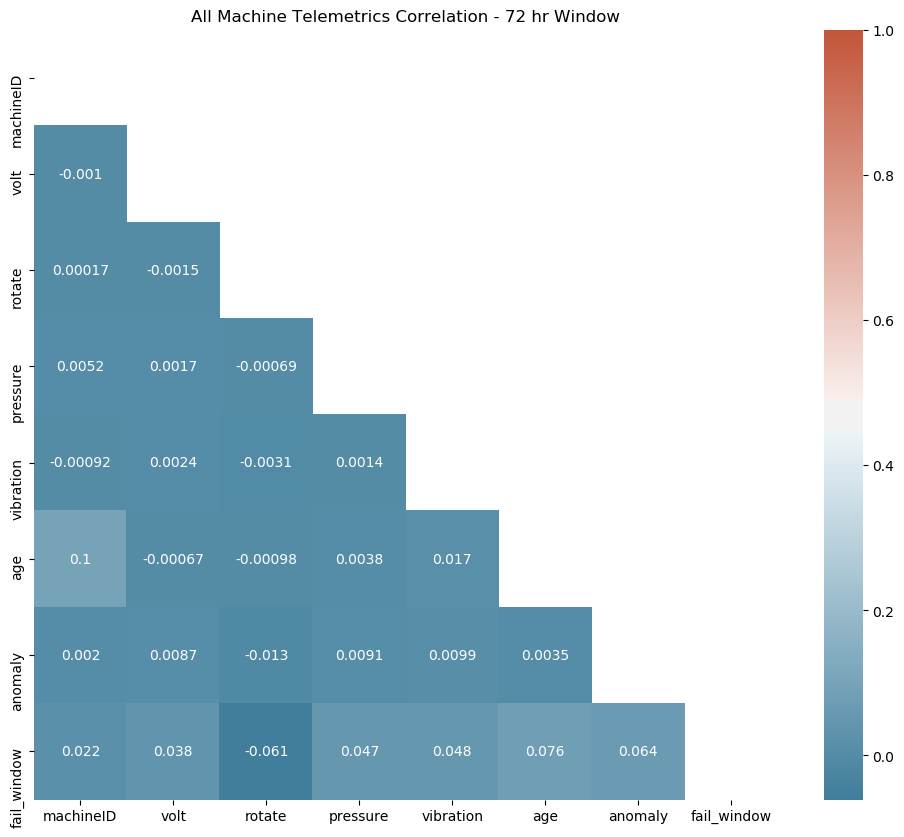

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#|
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask=mask,cmap=cmap).set(title="All Machine Telemetrics Correlation - 72 hr Window")
plt.show()

In [7]:
all_events.loc[all_events["failure"] == True]

,datetime,machineID,failure_comp1,failure_comp2,failure_comp3,failure_comp4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,error1,error2,error3,error4,error5,failure,maint,error,anomaly
96,2015-01-05 06:00:00,1,0,0,0,1,1,0,0,1,0,0,0,0,0,True,True,False,True
1536,2015-03-06 06:00:00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,True,True,False,True
2616,2015-04-20 06:00:00,1,0,1,0,0,0,1,0,0,0,0,0,0,0,True,True,False,True
4056,2015-06-19 06:00:00,1,0,0,0,1,1,0,0,1,0,0,0,0,0,True,True,False,True
5856,2015-09-02 06:00:00,1,0,0,0,1,1,0,0,1,0,0,0,0,0,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866546,2015-11-29 06:00:00,99,0,0,1,0,0,0,1,0,0,0,0,0,0,True,True,False,True
866906,2015-12-14 06:00:00,99,0,0,0,1,0,0,0,1,0,0,0,0,0,True,True,False,True
868347,2015-02-12 06:00:00,100,1,0,0,0,1,0,0,0,0,0,0,0,0,True,True,False,True
873387,2015-09-10 06:00:00,100,1,0,0,0,1,0,0,0,0,0,0,0,0,True,True,False,True


In [12]:
df.loc[df["fail_window"] == True]

,datetime,machineID,volt,rotate,pressure,vibration,model,age,anomaly,fail_window
24,2015-01-02 06:00:00,1,197.363125,446.943947,114.342061,29.527665,model3,18,False,True
25,2015-01-02 07:00:00,1,171.200895,384.645962,103.373293,35.796566,model3,18,False,True
26,2015-01-02 08:00:00,1,160.528861,486.459056,86.944273,42.992509,model3,18,False,True
27,2015-01-02 09:00:00,1,147.300678,420.610792,110.408985,34.203042,model3,18,False,True
28,2015-01-02 10:00:00,1,160.458503,412.965696,90.711354,36.963766,model3,18,False,True
...,...,...,...,...,...,...,...,...,...,...
875615,2015-12-12 02:00:00,100,169.230867,437.879728,93.926588,32.207154,model4,5,False,True
875616,2015-12-12 03:00:00,100,195.705465,477.234829,107.608877,35.297621,model4,5,False,True
875617,2015-12-12 04:00:00,100,141.425615,398.330623,114.736070,32.808884,model4,5,False,True
875618,2015-12-12 05:00:00,100,204.057593,489.276510,111.754287,33.974128,model4,5,False,True
